Accuracy: 0.933

Classification Report:
               precision    recall  f1-score   support

     no rain       0.95      0.98      0.96      1749
        rain       0.81      0.61      0.70       251

    accuracy                           0.93      2000
   macro avg       0.88      0.79      0.83      2000
weighted avg       0.93      0.93      0.93      2000

Predicted Grade: no rain ,for given weather input


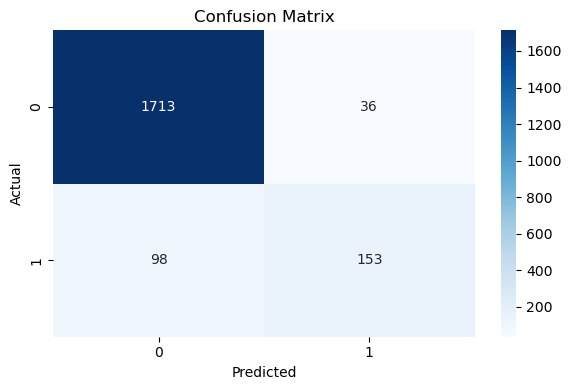

In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Step 1: Loading the saved model and scaler from pkl files
with open("../Artifacts/regression_model.pkl", "rb") as file: 
    loaded_model = pickle.load(file)
with open("../Artifacts/regression_scaler.pkl", "rb") as file:
    loaded_scaler = pickle.load(file)

#Step 2: Loading the test dataset
df_test = pd.read_csv('../Data/test_data.csv', delimiter=",")  

#Step 3: Preparing the test data
X_test = df_test.drop(columns=["Rain"]) 
y_test = df_test['Rain']

#Step 4: Scale the test data using loaded scaler
X_test_scaler = loaded_scaler.transform(X_test)

#Step 5: Make predictions of entire dataset
predictions = loaded_model.predict(X_test_scaler)

#Prediction function for the given input test   #Adjust to current data
def predict_weather(input_string):
    columns = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]

    # Convert input string into a list
    input_data = input_string.split(",")

    # Convert to DataFrame
    df_input = pd.DataFrame([input_data], columns=columns)

    # Convert numerical values from strings to floats
    df_input = df_input.apply(pd.to_numeric, errors='coerce')

    # Scale input using the same scaler
    input_scaled = loaded_scaler.transform(df_input)

    # Predict using the loaded model
    prediction = loaded_model.predict(input_scaled)[0]

    # Rain map
    rain_map = {0: "no rain", 1: "rain"}
    predicted_rain = rain_map[prediction]

    return predicted_rain


#Step 6: Evaluate predictions
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=["no rain", "rain"]))

#Example testing input from the csv file
weather_input = "20.5,65,13.2,60,1012" 

#Print predicted grade
print(f"Predicted Grade: {predict_weather(weather_input)} ,for given weather input")  

#Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

